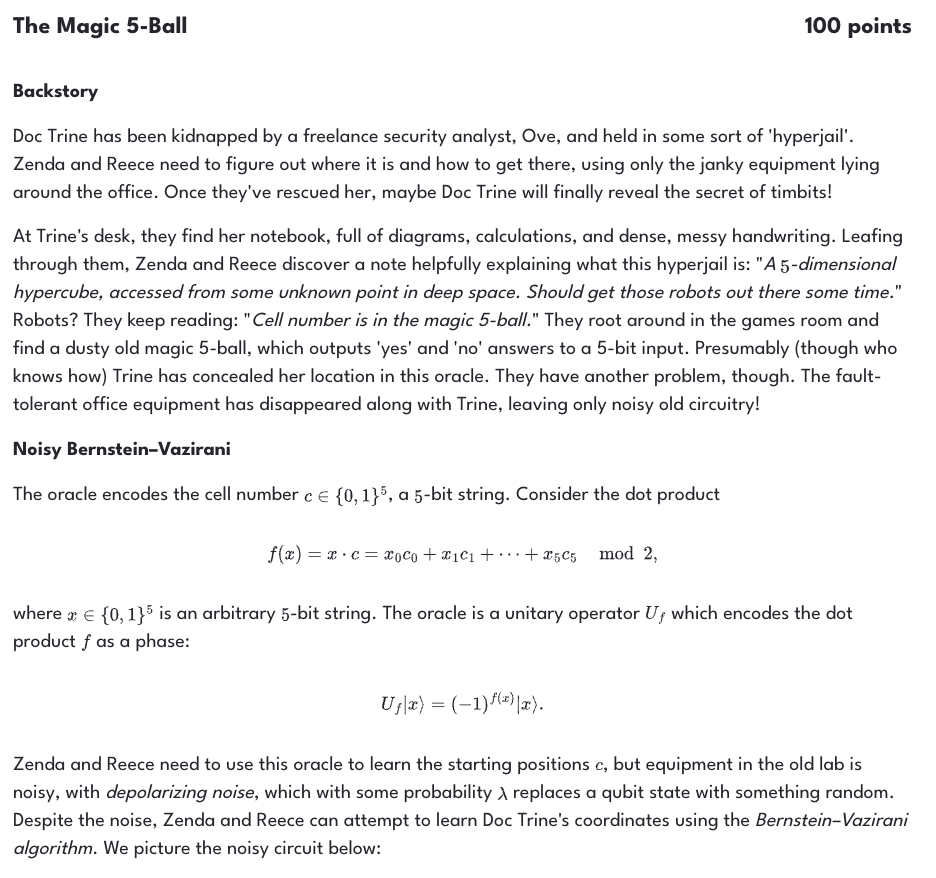

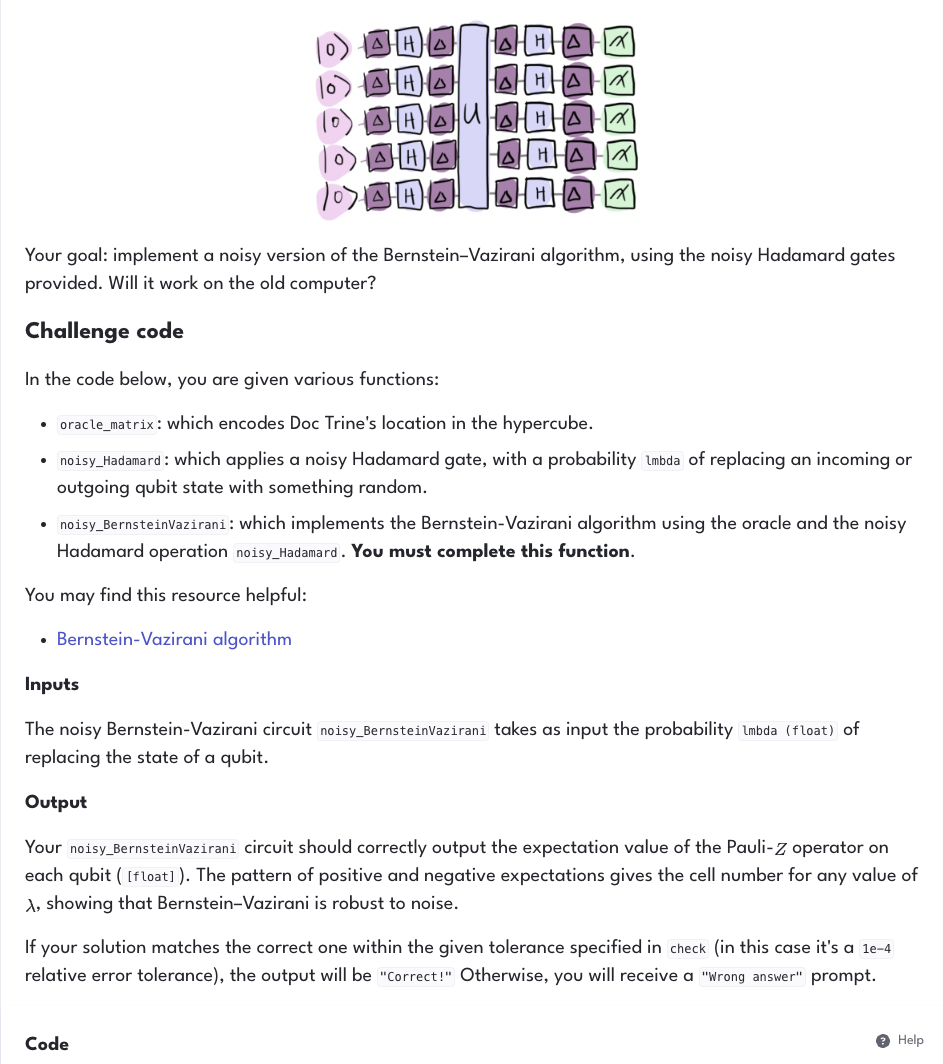

In [ ]:
import json
import pennylane as qml
import pennylane.numpy as np

def noisy_Hadamard(lmbda, wire):
    """A Hadamard gate with depolarizing noise on either side.
    
    Args:
        lmbda (float): The parameter defining the depolarizing channel.
        wire (int): The wire the depolarizing channel acts on.
    """
    qml.DepolarizingChannel(lmbda, wires=wire)
    qml.Hadamard(wire)
    qml.DepolarizingChannel(lmbda, wires=wire)

# Oracle matrix for Doc Trine's cell number

flips = [1, 3, 5, 7, 8, 10, 12, 14, 16, 18, 20, 22, 25, 27, 29, 31]

oracle_matrix = np.eye(2**5)
for i in flips:
    oracle_matrix[i, i] = -1

# Implement the Bernstein-Vazirani algorithm with depolarizing noise

dev = qml.device("default.mixed", wires = 5)
@qml.qnode(dev)
def noisy_BernsteinVazirani(lmbda):
    """Runs the Bernstein-Vazirani algorithm with depolarizing noise.

    Args:
        lmbda (float): The probability of erasing the state of a qubit.

    Returns:
        (list(float)): Expectation values for PauliZ on all n wires.
    """


    # Put your code here #


    return [qml.expval(qml.PauliZ(i)) for i in range(5)]
        


# These functions are responsible for testing the solution.
def run(test_case_input: str) -> str:

    lmbda = json.loads(test_case_input)
    output = noisy_BernsteinVazirani(lmbda).tolist()

    return str(output)

def check(solution_output: str, expected_output: str) -> None:
    
    solution_output = json.loads(solution_output)
    expected_output = json.loads(expected_output)
    assert np.allclose(
        solution_output, expected_output, rtol=1e-4
    ), "Your noisy Bernstein-Vazirani algorithm isn't giving the right answers!"


test_cases = [['0.1', '[-0.5641679, -0.5641679,  0.5641679,  0.5641679, -0.5641679]']]

for i, (input_, expected_output) in enumerate(test_cases):
    print(f"Running test case {i} with input '{input_}'...")

    try:
        output = run(input_)

    except Exception as exc:
        print(f"Runtime Error. {exc}")

    else:
        if message := check(output, expected_output):
            print(f"Wrong Answer. Have: '{output}'. Want: '{expected_output}'.")

        else:
            print("Correct!")

# problem 12 

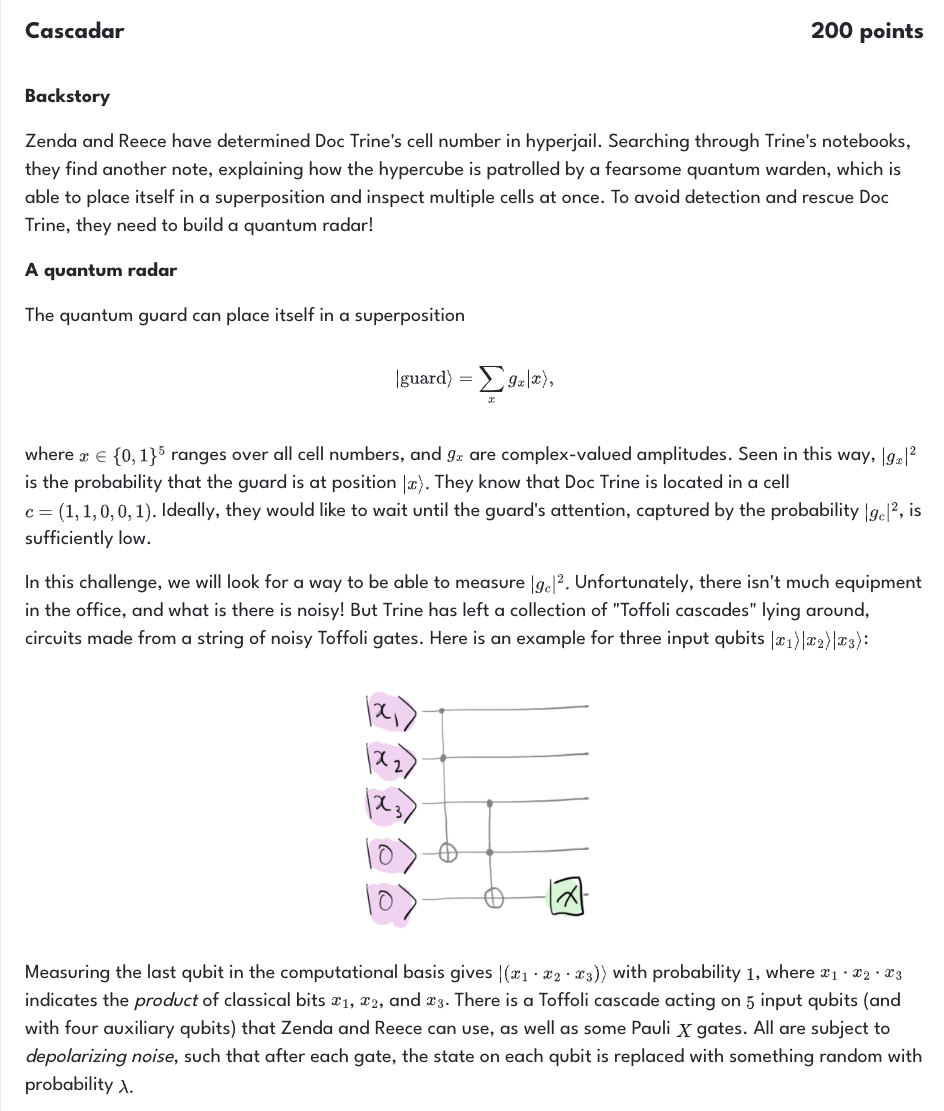

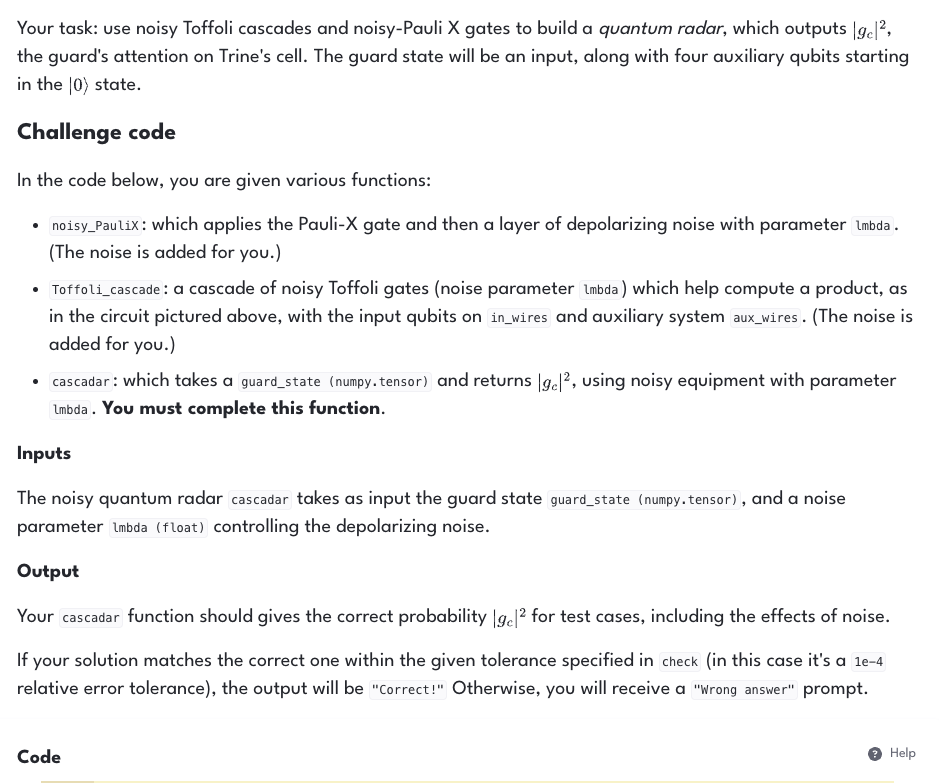

In [ ]:
import json
import pennylane as qml
import pennylane.numpy as np

In [ ]:
def noisy_PauliX(wire, lmbda):
    """A Pauli-X gate followed by depolarizing noise.

    Args:
        lmbda (float): The parameter defining the depolarizing channel.
        wire (int): The wire the depolarizing channel acts on.
    """
    qml.PauliX(wire)
    qml.DepolarizingChannel(lmbda, wires=wire)

def Toffoli_cascade(in_wires, aux_wires, lmbda):
    """A cascade of noisy Toffolis to help compute the product.
    
    Args:
        in_wires (list(int)): The input qubits.
        aux_wires (list(int)): The auxiliary qubits.
        lmbda (float): The probability of erasing the state of a qubit.
    """
    n = len(in_wires)
    qml.Toffoli(wires=[in_wires[0], in_wires[1], aux_wires[0]])
    qml.DepolarizingChannel(lmbda, wires=in_wires[0])
    qml.DepolarizingChannel(lmbda, wires=in_wires[1])
    qml.DepolarizingChannel(lmbda, wires=aux_wires[0])
    for i in range(n - 2):
        qml.Toffoli(wires=[in_wires[i + 2], aux_wires[i], aux_wires[i + 1]])
        qml.DepolarizingChannel(lmbda, wires=in_wires[i + 2])
        qml.DepolarizingChannel(lmbda, wires=aux_wires[i])
        qml.DepolarizingChannel(lmbda, wires=aux_wires[i + 1])

# Build a quantum radar to check how much attention is on Trine's cell
def cascadar(guard_state, lmbda):
    """Return the squared amplitude |g_c|^2 of the guard state, for c = (1, 1, 0, 0, 1).

    Args:
        guard_state (numpy.tensor): A 2**5 = 32 component vector encoding the guard state.
        lmbda (float): The probability of erasing the state of a qubit.

    Returns:
        (float): The squared amplitude of the guard state on the cell c.
    """
    dev = qml.device("default.mixed", wires = 5 + 4)
    
    @qml.qnode(dev)
    def circuit():
        """
        Circuit that will use the Toffoli_cascade and the noisy_PauliX.
        It will return a measurement on the last qubit.
        """

        qml.QubitStateVector(guard_state, range(5))

In [ ]:
        # Put your code here #

        return

    output = circuit()

    # if you want to post-process the output, put code here also #

    return

In [ ]:
# These functions are responsible for testing the solution.
def run(test_case_input: str) -> str:

    guard_state, lmbda = json.loads(test_case_input)
    output = cascadar(guard_state, lmbda)

    return str(output)

def check(solution_output: str, expected_output: str) -> None:

    solution_output = json.loads(solution_output)
    expected_output = json.loads(expected_output)
    assert np.allclose(
        solution_output, expected_output, rtol=1e-4
    ), "Your quantum radar isn't quite working properly!"

In [ ]:
test_cases = [['[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 0.0]', '1']]

In [ ]:
for i, (input_, expected_output) in enumerate(test_cases):
    print(f"Running test case {i} with input '{input_}'...")

    try:
        output = run(input_)

    except Exception as exc:
        print(f"Runtime Error. {exc}")

    else:
        if message := check(output, expected_output):
            print(f"Wrong Answer. Have: '{output}'. Want: '{expected_output}'.")

        else:
            print("Correct!")

# problem 13

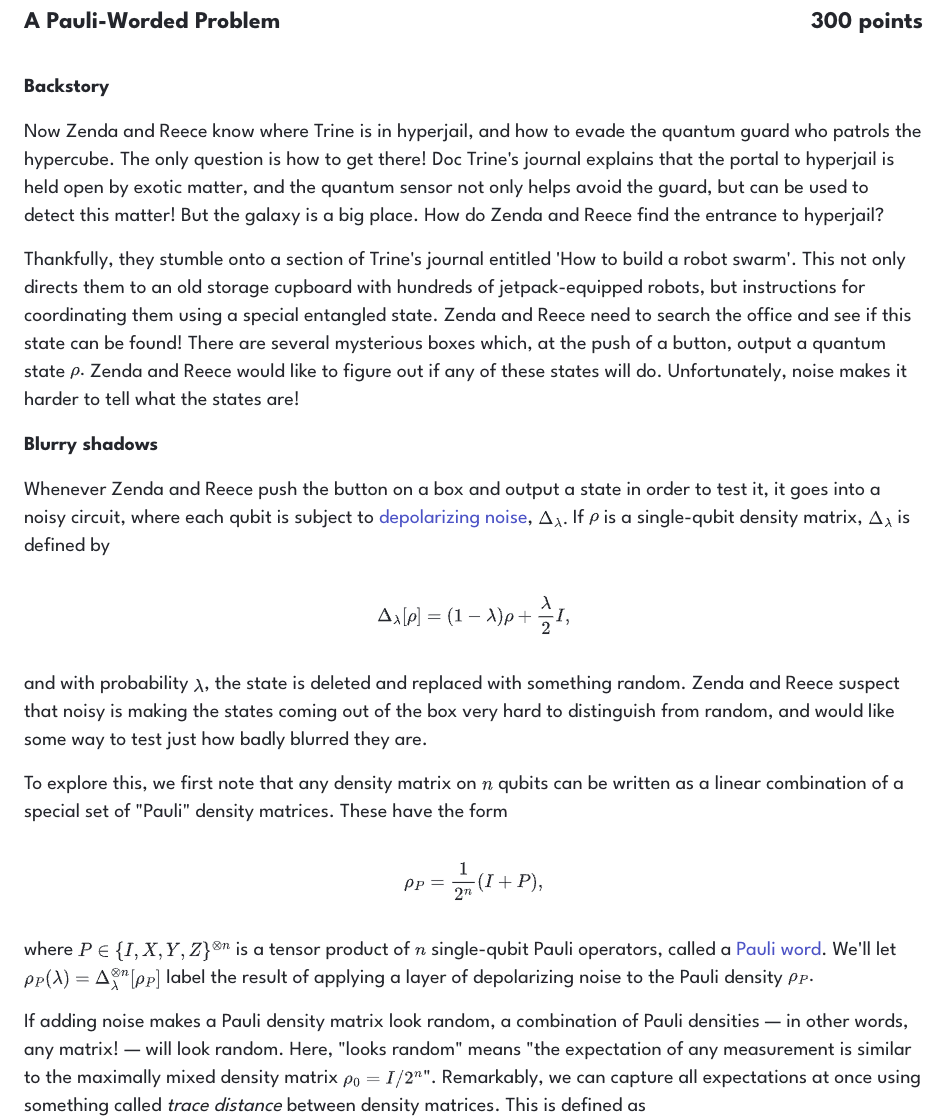

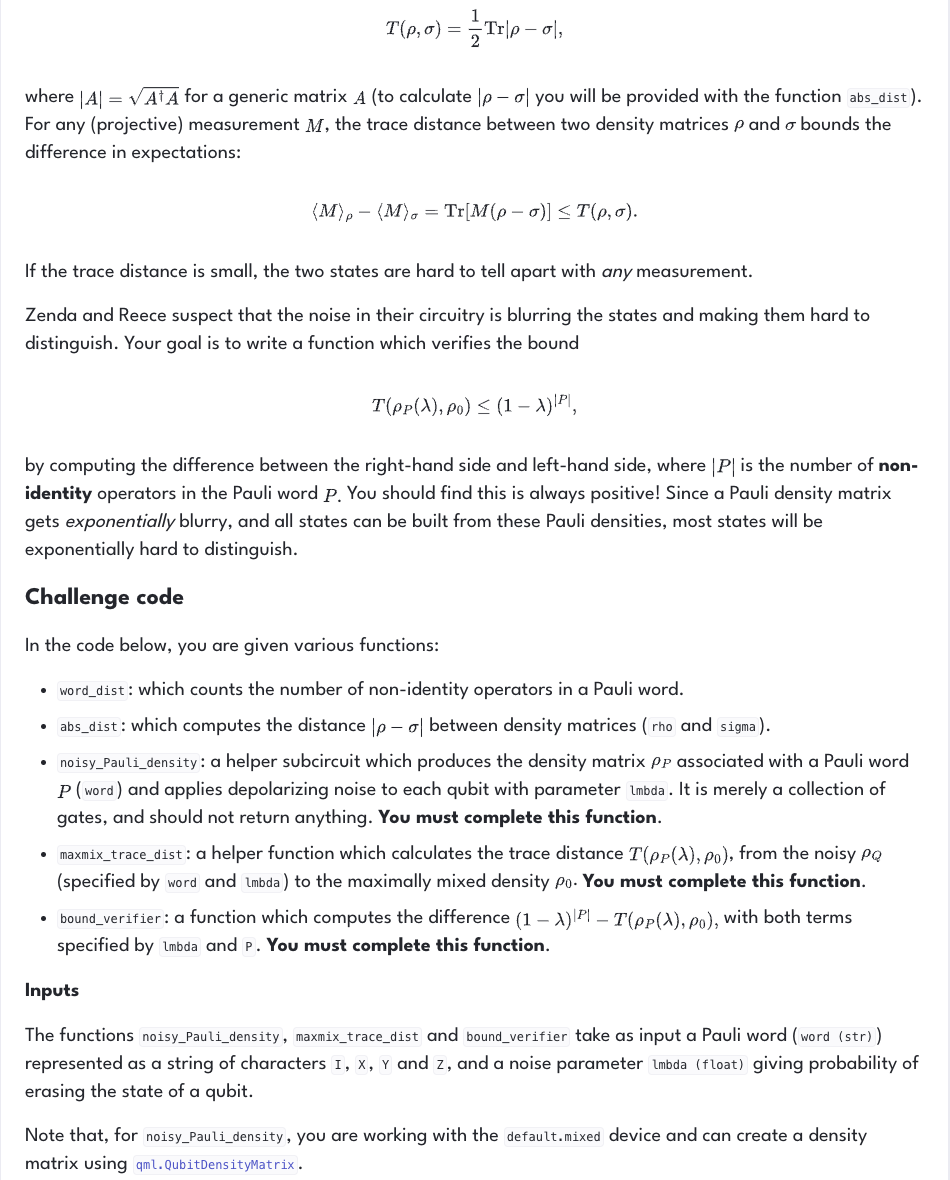

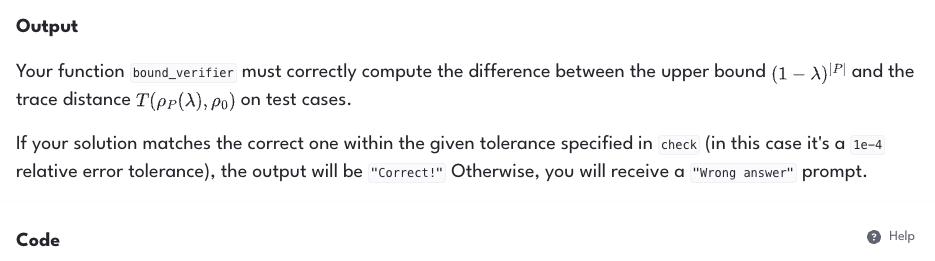

In [ ]:
import json
import pennylane as qml
import pennylane.numpy as np
import scipy

def abs_dist(rho, sigma):
    """A function to compute the absolute value |rho - sigma|."""
    polar = scipy.linalg.polar(rho - sigma)
    return polar[1]

def word_dist(word):
    """A function which counts the non-identity operators in a Pauli word"""
    return sum(word[i] != "I" for i in range(len(word)))


# Produce the Pauli density for a given Pauli word and apply noise

def noisy_Pauli_density(word, lmbda):
    """
       A subcircuit which prepares a density matrix (I + P)/2**n for a given Pauli
       word P, and applies depolarizing noise to each qubit. Nothing is returned.

    Args:
            word (str): A Pauli word represented as a string with characters I,  X, Y and Z.
            lmbda (float): The probability of replacing a qubit with something random.
    """


    # Put your code here #


# Compute the trace distance from a noisy Pauli density to the maximally mixed density

def maxmix_trace_dist(word, lmbda):
    """
       A function compute the trace distance between a noisy density matrix, specified
       by a Pauli word, and the maximally mixed matrix.

    Args:
            word (str): A Pauli word represented as a string with characters I, X, Y and Z.
            lmbda (float): The probability of replacing a qubit with something random.

    Returns:
            float: The trace distance between two matrices encoding Pauli words.
    """


    # Put your code here #
    return


def bound_verifier(word, lmbda):
    """
       A simple check function which verifies the trace distance from a noisy Pauli density
       to the maximally mixed matrix is bounded by (1 - lambda)^|P|.

    Args:
            word (str): A Pauli word represented as a string with characters I, X, Y and Z.
            lmbda (float): The probability of replacing a qubit with something random.

    Returns:
            float: The difference between (1 - lambda)^|P| and T(rho_P(lambda), rho_0).
    """


    # Put your code here #
    return


# These functions are responsible for testing the solution.
def run(test_case_input: str) -> str:

    word, lmbda = json.loads(test_case_input)
    output = np.real(bound_verifier(word, lmbda))

    return str(output)


def check(solution_output: str, expected_output: str) -> None:

    solution_output = json.loads(solution_output)
    expected_output = json.loads(expected_output)
    assert np.allclose(
        solution_output, expected_output, rtol=1e-4
    ), "Your trace distance isn't quite right!"


test_cases = [['["XXI", 0.7]', '0.0877777777777777'], ['["XXIZ", 0.1]', '0.4035185185185055'], ['["YIZ", 0.3]', '0.30999999999999284'], ['["ZZZZZZZXXX", 0.1]', '0.22914458207245006']]

for i, (input_, expected_output) in enumerate(test_cases):
    print(f"Running test case {i} with input '{input_}'...")

    try:
        output = run(input_)

    except Exception as exc:
        print(f"Runtime Error. {exc}")

    else:
        if message := check(output, expected_output):
            print(f"Wrong Answer. Have: '{output}'. Want: '{expected_output}'.")

        else:
            print("Correct!")